<a href="https://colab.research.google.com/github/dimassaputra-05/Kalkulus/blob/main/UAS_KALKU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Muhamad Dimas Saputra**
## ****

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# **Fast Fourier Transform(FFT)**

>Suatu hari, di sebuah laboratorium di sebuah universitas ternama, seorang >mahasiswa bernama Rina sedang mempelajari sinyal dan sistem. Dosen Rina >memberikan tugas yang cukup menantang: mengimplementasikan algoritma Fast >Fourier Transform (FFT) menggunakan Python, tanpa menggunakan library >selain numpy.
>
>Untuk membantu Rina memahami konsep FFT lebih dalam, dosen memberikan >sebuah sinyal yang harus dia analisis. Sinyal tersebut diberikan oleh >persamaan berikut:
>
>𝑥
>(
>𝑡
>)
>=
>𝑒
>0.05
>𝑡
>⋅
>tanh
>⁡
>(
>2
>𝜋
>5
>𝑡
>)
>Rina harus menghitung FFT dari sinyal ini, di mana
>𝑡
> adalah array linspace dari 0 hingga 1, dengan 1024 titik. Tugas Rina adalah membuat fungsi fft(x) dalam Python yang mengimplementasikan algoritma FFT tanpa menggunakan library selain numpy dan matplotlib. Dan menggunakan sinyal tersebut sebagai contoh untuk menghitung hasil FFT-nya.


Langkah-langkah:

* Definisikan fungsi fft(x) yang mengimplementasikan algoritma FFT.
* Buat sinyal $𝑥(𝑡)$  menggunakan fungsi eksponensial dan fungsi tangen hiperbolik.

* Hitung FFT dari sinyal tersebut menggunakan fungsi fft(x).

* Plot sinyal asli dan hasil FFT untuk mengidentifikasi frekuensi dominan dalam sinyal.

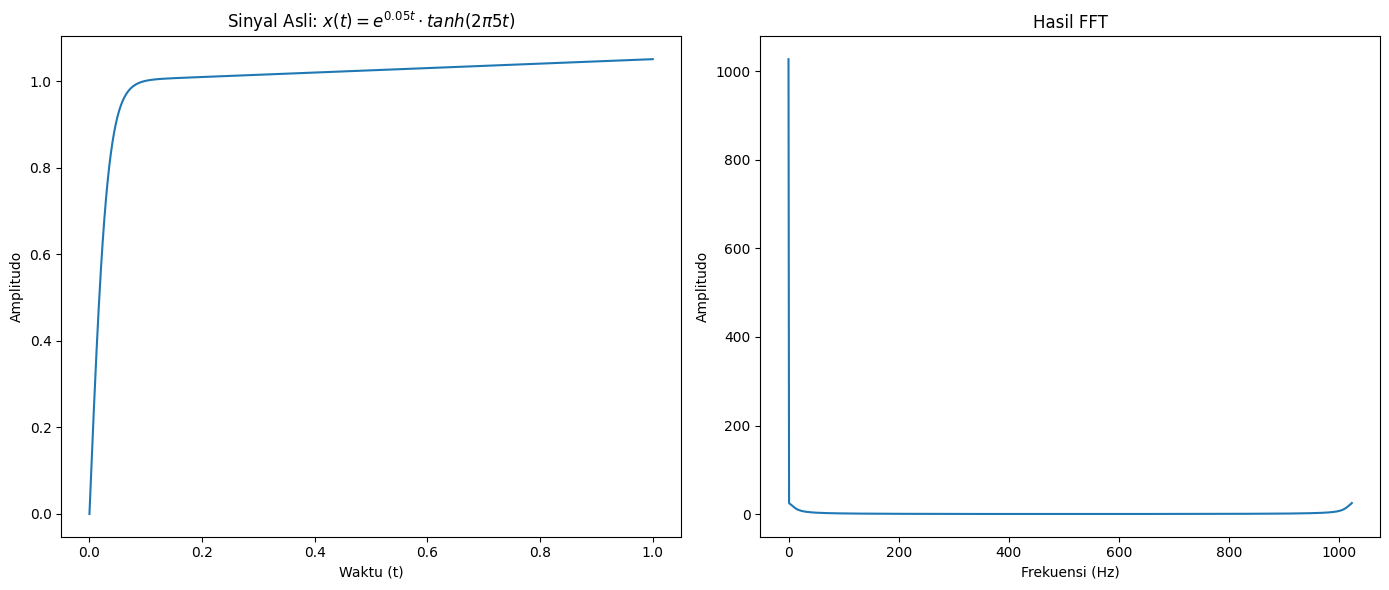

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def fft(x):
    N = len(x)
    if N <= 1:
        return x
    even = fft(x[0::2])
    odd = fft(x[1::2])
    terms = np.exp(-2j * np.pi * np.arange(N // 2) / N)
    return np.concatenate([even + terms * odd, even - terms * odd])

# Definisikan t dan x(t)
t = np.linspace(0, 1, 1024)  # Ubah 1000 menjadi 1024 untuk memastikan panjang array adalah pangkat dua
x_t = np.exp(0.05 * t) * np.tanh(2 * np.pi * 5 * t)

# Hitung FFT dari x(t)
X_f = fft(x_t)

# Visualisasikan sinyal asli dan hasil FFT
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(t, x_t)
plt.title('Sinyal Asli: $x(t) = e^{0.05t} \\cdot tanh(2\\pi 5 t)$')
plt.xlabel('Waktu (t)')
plt.ylabel('Amplitudo')

plt.subplot(1, 2, 2)
plt.plot(np.abs(X_f))
plt.title('Hasil FFT')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')

plt.tight_layout()
plt.show()


# **Wavelete**

>Seorang ahli bioinformatika sedang menganalisis data genom untuk mendeteksi mutasi genetik yang berpotensi menyebabkan penyakit tertentu. Data genom ini dalam bentuk sinyal DNA yang terdiri dari urutan nukleotida. Untuk mengidentifikasi pola dan anomali dalam sinyal DNA, ia menggunakan transformasi wavelet.
>
>Sinyal DNA 𝑠(𝑡)dapat dinyatakan sebagai berikut:
>
>$𝑠(𝑡)=4cos⁡(2𝜋8𝑡)+3cos⁡(2𝜋30𝑡)$
>
>**Pertanyaan:**
>1. Gambarkan sinyal DNA 𝑠(𝑡)dalam domain waktu untuk interval $0 ≤ 𝑡 ≤ 1 $detik.
>
>2. Lakukan transformasi wavelet diskrit (DWT) pada sinyal $𝑠(𝑡)$ secara manual tanpa menggunakan library wavelet yang tersedia. Tampilkan koefisien wavelet yang diperoleh untuk satu level dekomposisi.



**1. Menggambar sinyal DNA 𝑠(𝑡)**

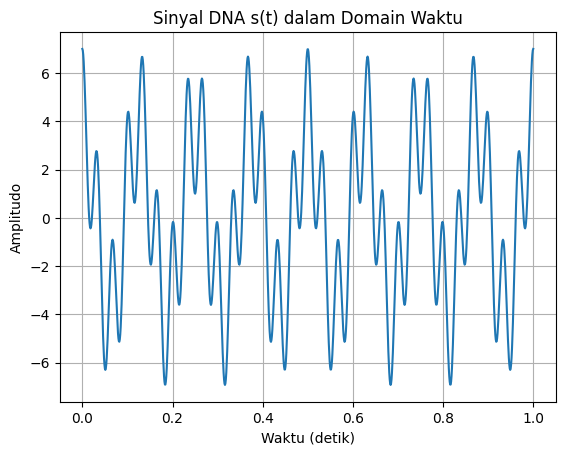

In [4]:
# Definisikan fungsi sinyal DNA
def s(t):
    return 4 * np.cos(2 * np.pi * 8 * t) + 3 * np.cos(2 * np.pi * 30 * t)

# Buat array waktu
t = np.linspace(0, 1, 1000)

# Hitung nilai sinyal
s_t = s(t)

# Gambar sinyal
plt.plot(t, s_t)
plt.title('Sinyal DNA s(t) dalam Domain Waktu')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.show()


**1. Transformasi wavelet diskrit (DWT)**

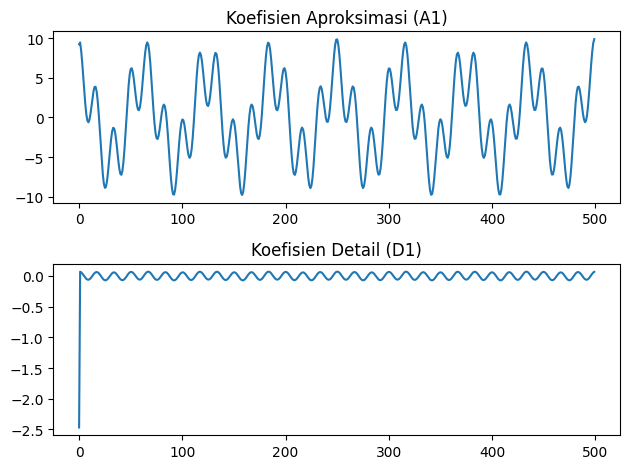

In [5]:
# Fungsi wavelet sederhana (Daubechies 4-tap)
def dwt_step(signal):
    h = [0.48296, 0.83652, 0.22414, -0.12941]
    g = [-0.12941, -0.22414, 0.83652, -0.48296]

    # Aproksimasi (low-pass filter)
    approx = np.convolve(signal, h, mode='same')[::2]
    # Detail (high-pass filter)
    detail = np.convolve(signal, g, mode='same')[::2]

    return approx, detail

# Lakukan dekomposisi level 1
a1, d1 = dwt_step(s_t)

# Gambar hasil dekomposisi
plt.subplot(2, 1, 1)
plt.plot(a1)
plt.title('Koefisien Aproksimasi (A1)')

plt.subplot(2, 1, 2)
plt.plot(d1)
plt.title('Koefisien Detail (D1)')

plt.tight_layout()
plt.show()
